In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import CubicHermiteSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Gabriel Rodríguez Suárez
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



# Interpolando la función $sin(x)$:

In [ ]:
x_seno = np.array([0, np.pi/2, np.pi])
y_seno = np.sin(x_seno)
P_seno = lagrange(x_seno, y_seno)
print(P_seno)

         2
-0.4053 x + 1.273 x


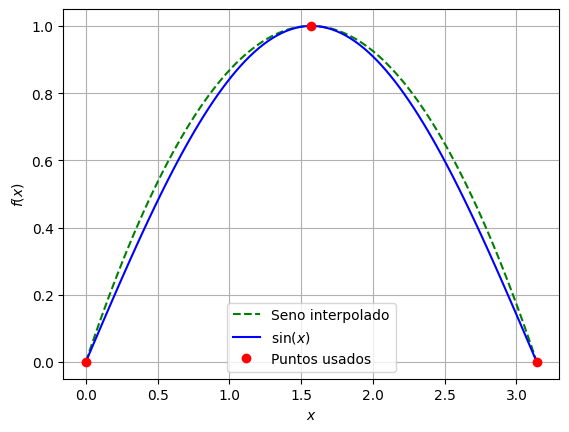

In [ ]:
x_sin_interpol = np.linspace(min(x_seno), max(x_seno), 100)
y_sin_interpol = P_seno(x_sin_interpol)

plt.plot(x_sin_interpol, y_sin_interpol, 'g--', label='Seno interpolado')
plt.plot(x_sin_interpol, np.sin(x_sin_interpol), 'b-', label='$\sin(x)$')
plt.plot(x_seno, y_seno, 'ro', label='Puntos usados')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()

#Error calculado explícitamente:

$$\epsilon = f(x) - P(x)$$

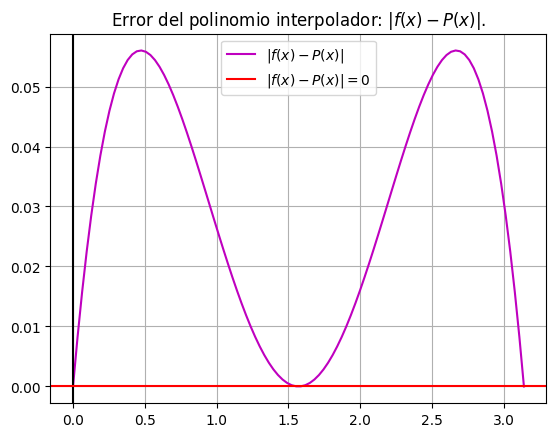

In [ ]:
error_seno_explicito = np.abs(np.sin(x_sin_interpol) - y_sin_interpol)
plt.plot(x_sin_interpol, error_seno_explicito, 'm-', label='$|f(x) - P(x)|$')
plt.title("Error del polinomio interpolador: $|f(x) - P(x)|$.")
plt.axvline(0, color='black')
plt.axhline(0, color='red', label="$|f(x) - P(x)| = 0$")
plt.legend()
plt.grid()
plt.show()

## Cálculo del error con la fórmula:

$$\epsilon = \frac{1}{(n+1)!} f^{(n+1)}(x)(x - x_0)(x - x_1) ... (x - x_n) $$

In [ ]:
x = sp.symbols('x')
f_sin = sp.sin(x)

In [ ]:
def error_lagrange(f,x_points,x_inter):
  n = len(x_points)
  x = sp.symbols('x')
  df_n = sp.diff(f,x,n) #Calcula la derivada siendo f una función simbólica.

  u = 1
  for i in x_points:
    u *= (x-i)
    #print(u)

  epsilon = abs((1/mt.factorial(n+1))*df_n*u)
  epsilon_l = sp.lambdify(x,epsilon)

  errores = np.zeros(len(x_inter))
  for j in range(len(x_inter)):
    errores[j] = epsilon_l(x_inter[j])
  return errores

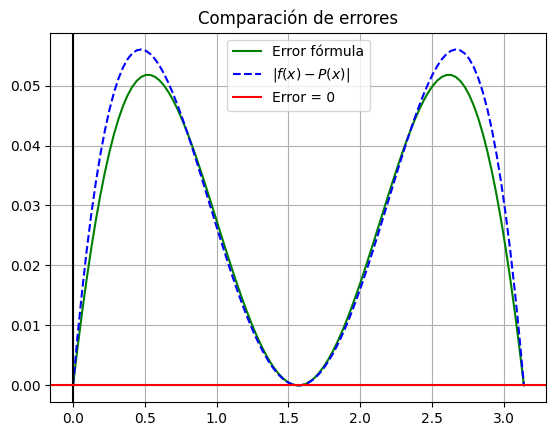

In [ ]:
error_formula = error_lagrange(f_sin,x_seno,x_sin_interpol)

plt.plot(x_sin_interpol, error_formula, 'g-', label='Error fórmula')
plt.plot(x_sin_interpol, error_seno_explicito, 'b--', label='$|f(x)-P(x)|$')
plt.title("Comparación de errores")
plt.axvline(0, color='black')
plt.axhline(0, color='red', label="Error = 0")
plt.legend()
plt.grid()
plt.show()

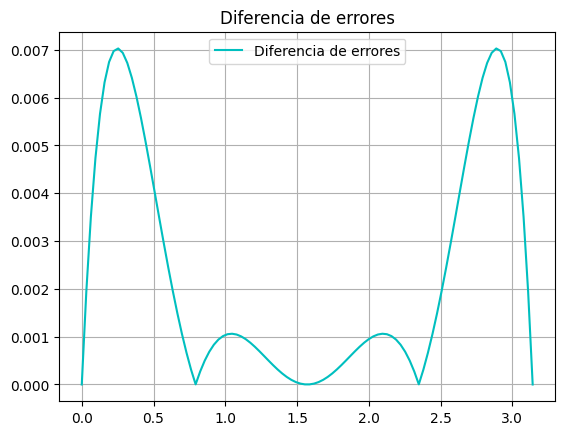

In [ ]:
error_del_error = abs(error_formula - error_seno_explicito)

plt.plot(x_sin_interpol, error_del_error, 'c-', label='Diferencia de errores')
plt.title('Diferencia de errores')
plt.legend()
plt.grid()
plt.show()

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [ ]:
x = sp.symbols('x')
f_sin = sp.sin(x)
derivatives = sp.diff(f_sin, x)
d_lamb = sp.lambdify(x, derivatives)
puntos_derivados = d_lamb(x_seno)
Polinom_H = CubicHermiteSpline(x_seno, y_seno, puntos_derivados)

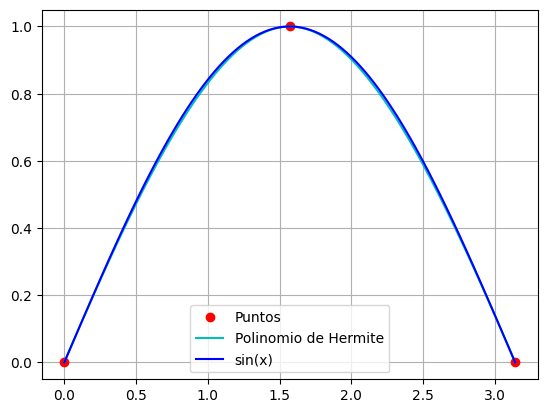

In [ ]:
plt.plot(x_seno, y_seno, 'ro', label="Puntos")
plt.plot(x_sin_interpol, Polinom_H(x_sin_interpol), 'c-', label='Polinomio de Hermite')
plt.plot(x_sin_interpol, np.sin(x_sin_interpol), 'b-', label='sin(x)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
type(np.shape(x_seno)[0])

int

In [ ]:
def error_hermite(funcion, puntos_x, interp_de_x):
  #print(puntos_x)
  x = sp.symbols('x')
  n = len(puntos_x)
  #print(f"n = {n}")
  orden_derivada = 2*n +2
  derivada = sp.diff(funcion, x, orden_derivada)
  #print(derivada)

  product = 1
  for i in puntos_x:
    product *= (x-i)**2

  epsilon = (derivada)/mt.factorial(2*n+2)*product
  epsilon_lambda = sp.lambdify(x, epsilon)

  errores = np.zeros(len(interp_de_x))

  for j in range(len(interp_de_x)):
    errores[j] = epsilon_lambda(interp_de_x[j])
  return errores

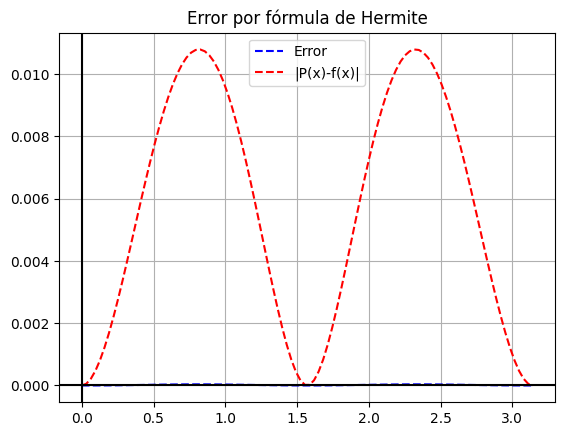

In [ ]:
error_hermite_seno = error_hermite(f_sin, x_seno, x_sin_interpol)
error_resta = np.abs(np.sin(x_sin_interpol)-Polinom_H(x_sin_interpol))

plt.plot(x_sin_interpol, error_hermite_seno, 'b--', label='Error')
plt.plot(x_sin_interpol, error_resta, 'r--', label='|P(x)-f(x)|')
plt.title('Error por fórmula de Hermite')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.legend()
plt.grid()
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

# Hallar el $\sigma_{0}$:

In [ ]:
energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

In [ ]:
def sigma_cero(energy, exp_sigma):
  Er = 78
  gamma = 55
  sigma = exp_sigma*((energia-Er)**2 + (gamma**2)/4)
  return sigma

In [ ]:
sigma_0 = sigma_cero(energia, sigma_exp)
sigma_0

array([72506.65  , 57044.    , 69311.25  , 63898.375 , 65485.2   ,
       59008.475 , 64154.7   , 83863.3125, 73509.175 ])

In [ ]:
E = sp.symbols('E')
Er = 78
s0 = sigma_0[0] #Se toma el valor del sigma cero como el primero de los calculados.
g = 55
sigma = s0/((E-Er)**2 + (g**2)/4)
sigma_l = sp.lambdify(E, sigma)

In [ ]:
scater = sigma_l(energia)

energia2 = np.linspace(0,200,450)
scater2 = sigma_l(energia2)

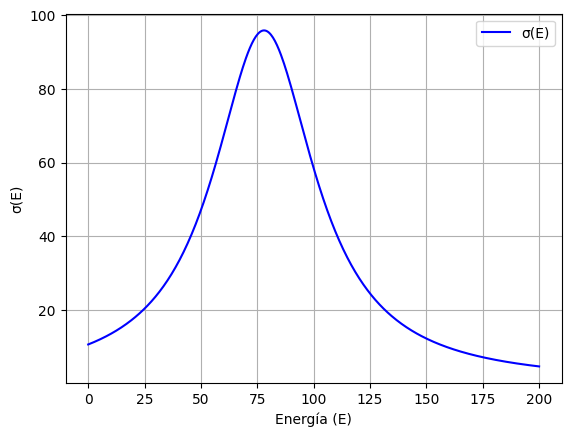

In [ ]:
plt.plot(energia2, scater2, 'b-', label="σ(E)")
plt.xlabel('Energía (E)')
plt.ylabel('σ(E)')
plt.legend()
plt.grid()
plt.show()

# Polinomios de Lagrange:

In [ ]:
scater_lagrange = lagrange(energia, scater)
print(scater_lagrange)

            8             7             6             5            4
-1.833e-13 x + 1.559e-10 x - 5.454e-08 x + 1.008e-05 x - 0.001046 x
            3         2
 + 0.05954 x - 1.669 x + 17.8 x + 10.6


# Polinomios de Newton:

In [ ]:
scater_newton = BarycentricInterpolator(energia, scater)

# Polinomios de Hermite:

In [ ]:
dif_sigma = sp.diff(sigma, E)
dif_sigma_l = sp.lambdify(E, sigma)
dif_scater = dif_sigma_l(energia)

In [ ]:
scater_hermite = CubicHermiteSpline(energia, scater, dif_scater)

# Gráfico con los polinomios:

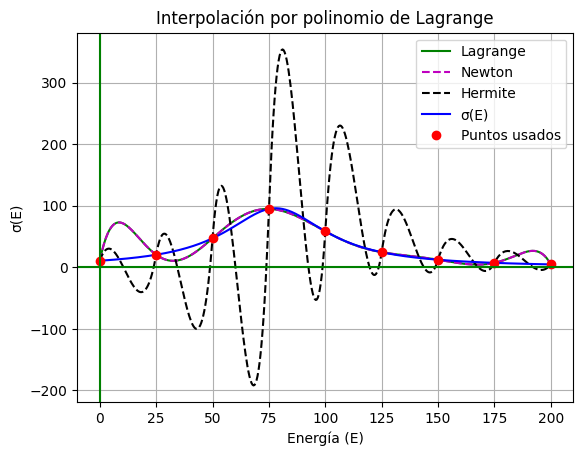

In [ ]:
scater_interpol_lag = scater_lagrange(energia2)
scater_interpol_new = scater_newton(energia2) #Estas tres son para evaluar los puntos de energia2 en los polinomios.
scater_interpol_her = scater_hermite(energia2)

plt.plot(energia2, scater_interpol_lag, 'g-', label='Lagrange')
plt.plot(energia2, scater_interpol_new, 'm--', label='Newton')
plt.plot(energia2, scater_interpol_her, 'k--', label='Hermite')
plt.plot(energia2, scater2, 'b-', label="σ(E)")
plt.plot(energia, scater, 'ro', label='Puntos usados')
plt.title('Interpolación por polinomio de Lagrange')
plt.legend()
plt.xlabel('Energía (E)')
plt.ylabel('σ(E)')
plt.axvline(0, color='green')
plt.axhline(0, color='green')
plt.grid()
plt.show()

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

## Por polinomios de Lagrange

In [ ]:
x = sp.symbols('x')
f_fracc = 1/(1+25*(x**2))
f_fraccl = sp.lambdify(x, f_fracc)
n = 4
puntos_en_x = np.linspace(-1,1, n) #Puntos equiespaciados.
puntos_en_y = f_fraccl(puntos_en_x) #Calculados con la función.
print(puntos_en_x)

[-1.         -0.33333333  0.33333333  1.        ]


In [ ]:
polinom_fracc = lagrange(puntos_en_x, puntos_en_y)
print(polinom_fracc)

           3          2
1.735e-17 x - 0.2545 x - 6.072e-18 x + 0.293


In [ ]:
def calculo_puntos(funcion):
  lista_x = []
  #lista_y = []
  numbers = np.array([4,8,12,16,20])
  for i in range(len(numbers)):
    x_points = np.linspace(-1,1,numbers[i])
    y_points = funcion(x_points)
    #polinom_fracc = lagrange(x_points, y_points)
    lista_x.append([x_points, y_points])
    #lista_y.append(y_points)
  return lista_x

In [ ]:
puntos_4 = calculo_puntos(f_fraccl)[0]
puntos_8 = calculo_puntos(f_fraccl)[1]
puntos_12 = calculo_puntos(f_fraccl)[2]
puntos_16 = calculo_puntos(f_fraccl)[3]
puntos_20 = calculo_puntos(f_fraccl)[4]

In [ ]:
def calculo_iterado(funcion):
  lista_pol = []
  numbers = np.array([4,8,12,16,20])
  for i in range(len(numbers)):
    x_points = np.linspace(-1,1,numbers[i])
    y_points = funcion(x_points)
    polinom_fracc = lagrange(x_points, y_points)
    lista_pol.append(polinom_fracc)
  return lista_pol

In [ ]:
pol4 = calculo_iterado(f_fraccl)[0]
pol8 = calculo_iterado(f_fraccl)[1]
pol12 = calculo_iterado(f_fraccl)[2]
pol16 = calculo_iterado(f_fraccl)[3]
pol20 = calculo_iterado(f_fraccl)[4]

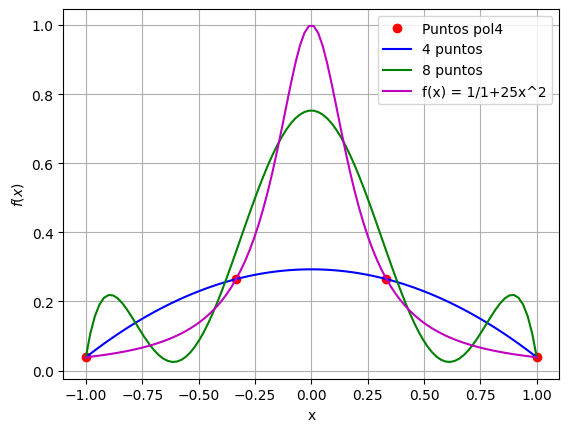

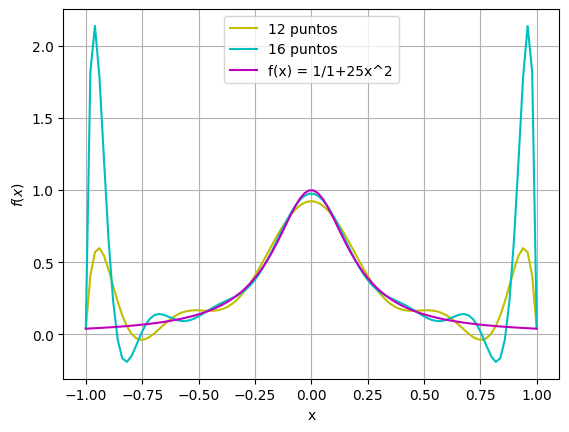

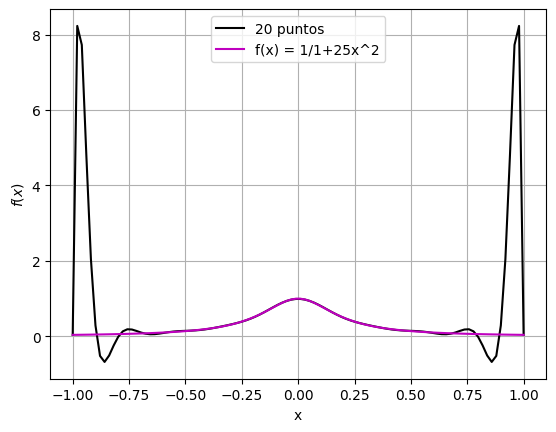

In [ ]:
array_x = np.linspace(-1,1, 100)
#print(array_x)

plt.plot(puntos_en_x, puntos_en_y, 'ro', label='Puntos pol4')
plt.plot(array_x, pol4(array_x), 'b-', label='4 puntos')
plt.plot(array_x, pol8(array_x), 'g-', label='8 puntos')
plt.plot(array_x, f_fraccl(array_x), 'm-', label='f(x) = 1/1+25x^2')
plt.legend()
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()

plt.plot(array_x, pol12(array_x), 'y-', label='12 puntos')
plt.plot(array_x, pol16(array_x), 'c-', label='16 puntos')
plt.plot(array_x, f_fraccl(array_x), 'm-', label='f(x) = 1/1+25x^2')
plt.legend()
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()

plt.plot(array_x, pol20(array_x), 'k-', label='20 puntos')
plt.plot(array_x, f_fraccl(array_x), 'm-', label='f(x) = 1/1+25x^2')
plt.legend()
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()

# Fórmula del error:

In [ ]:
def error_lagrange2(f,x_points):
  x_inter = np.linspace(min(x_points), max(x_points),100)
  n = len(x_points)
  x = sp.symbols('x')
  df_n = sp.diff(f,x,n) #Calcula la derivada siendo f una función simbólica.

  u = 1
  for i in x_points:
    u *= (x-i)
    #print(u)

  epsilon = abs((1/mt.factorial(n+1))*df_n*u)
  epsilon_l = sp.lambdify(x,epsilon)

  errores = np.zeros(len(x_inter))
  for j in range(len(x_inter)):
    errores[j] = epsilon_l(x_inter[j])
  return errores, x_inter

In [ ]:
puntos_8[0]

array([-1.        , -0.71428571, -0.42857143, -0.14285714,  0.14285714,
        0.42857143,  0.71428571,  1.        ])

In [ ]:
f_fracc

    1    
─────────
    2    
25⋅x  + 1

In [ ]:
error4, inter4 = error_lagrange2(f_fracc, puntos_4[0])
error8, inter8 = error_lagrange2(f_fracc, puntos_8[0])
error12, inter12 = error_lagrange2(f_fracc, puntos_12[0])
error16, inter16 = error_lagrange2(f_fracc, puntos_16[0])
error20, inter20 = error_lagrange2(f_fracc, puntos_20[0])

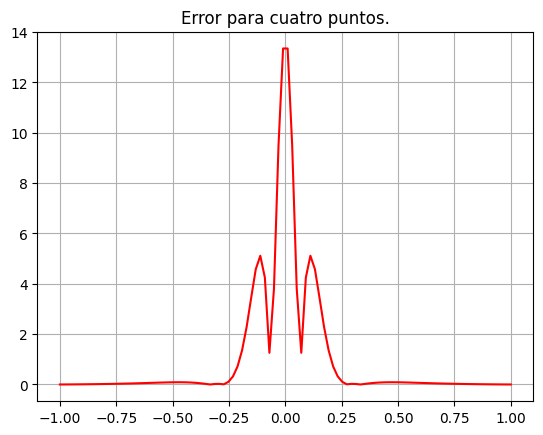

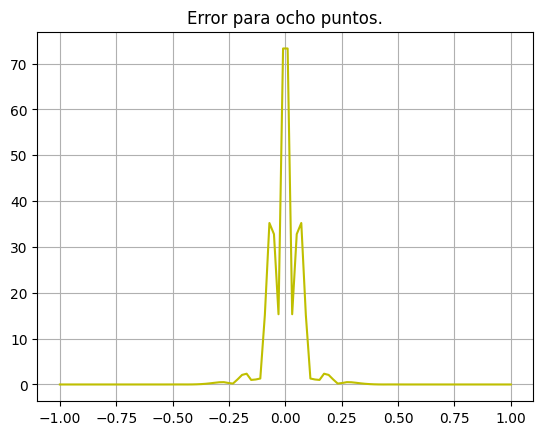

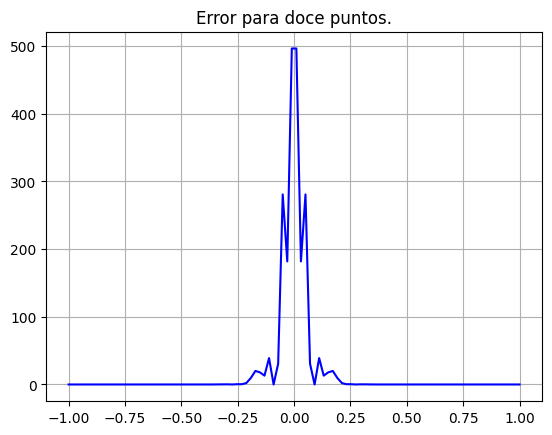

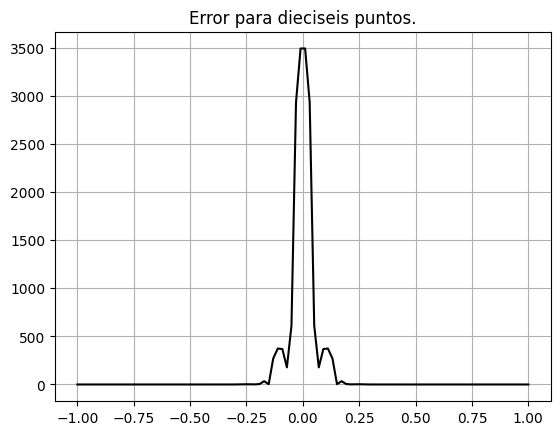

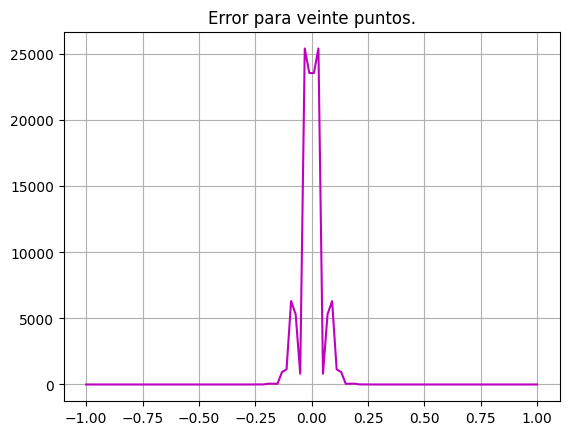

In [ ]:
plt.plot(inter4, error4, 'r-')
plt.title('Error para cuatro puntos.')
plt.grid()
plt.show()

plt.plot(inter8, error8, 'y-')
plt.title('Error para ocho puntos.')
plt.grid()
plt.show()

plt.plot(inter12, error12, 'b-')
plt.title('Error para doce puntos.')
plt.grid()
plt.show()

plt.plot(inter16, error16, 'k-')
plt.title('Error para dieciseis puntos.')
plt.grid()
plt.show()

plt.plot(inter20, error20, 'm-')
plt.title('Error para veinte puntos.')
plt.grid()
plt.show()

# Por polinomios de Hermite
Recomendación, activar la subsección de **Por polinomios de Lagrange**

In [ ]:
def calculo_hermite(funcion):
  derivada_fracc =  sp.diff(funcion, x)
  derivada_fracc_l = sp.lambdify(x, derivada_fracc)
  funcion_l = sp.lambdify(x, f_fracc)
  lista_hermite = []
  numbers = np.array([4,8,12,16,20])
  for i in range(len(numbers)):
    x_points = np.linspace(-1,1,numbers[i])
    x_primes = derivada_fracc_l(x_points)
    y_points = funcion_l(x_points)
    hermite_fracc = CubicHermiteSpline(x_points, y_points, x_primes)
    lista_hermite.append(hermite_fracc)
  return lista_hermite

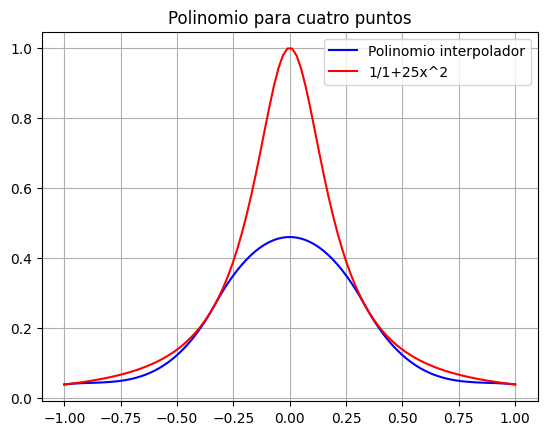

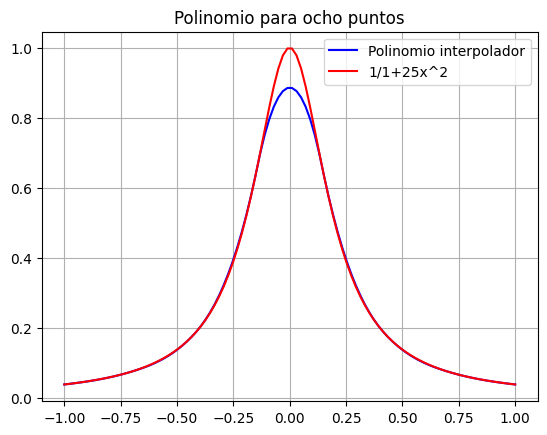

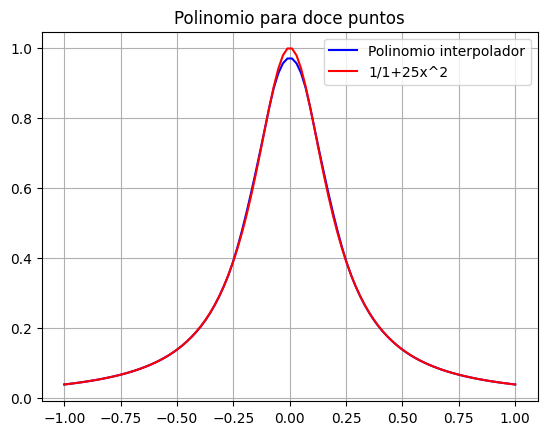

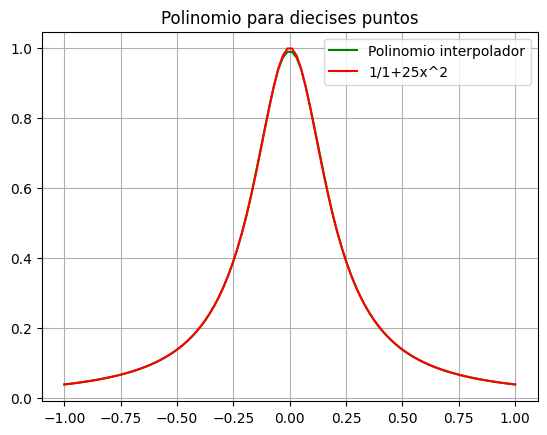

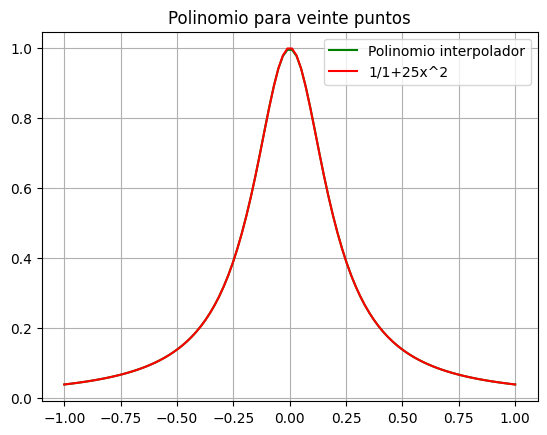

In [ ]:
polinomios_hermite = calculo_hermite(f_fracc)
#print(len(polinomios_hermite))

plt.plot(array_x, polinomios_hermite[0](array_x), 'b-', label='Polinomio interpolador')
plt.plot(array_x, f_fraccl(array_x), 'r-', label='1/1+25x^2')
plt.title('Polinomio para cuatro puntos')
plt.legend()
plt.grid()
plt.show()

plt.plot(array_x, polinomios_hermite[1](array_x), 'b-', label='Polinomio interpolador')
plt.plot(array_x, f_fraccl(array_x), 'r-', label='1/1+25x^2')
plt.title('Polinomio para ocho puntos')
plt.legend()
plt.grid()
plt.show()

plt.plot(array_x, polinomios_hermite[2](array_x), 'b-', label='Polinomio interpolador')
plt.plot(array_x, f_fraccl(array_x), 'r-', label='1/1+25x^2')
plt.title('Polinomio para doce puntos')
plt.legend()
plt.grid()
plt.show()

plt.plot(array_x, polinomios_hermite[3](array_x), 'g-', label='Polinomio interpolador')
plt.plot(array_x, f_fraccl(array_x), 'r-', label='1/1+25x^2')
plt.title('Polinomio para diecises puntos')
plt.legend()
plt.grid()
plt.show()

plt.plot(array_x, polinomios_hermite[4](array_x), 'g-', label='Polinomio interpolador')
plt.plot(array_x, f_fraccl(array_x), 'r-', label='1/1+25x^2')
plt.title('Polinomio para veinte puntos')
plt.legend()
plt.grid()
plt.show()

Para los polinomios de Hermite, se observa que a medida que se agregan más puntos para evaluar en el polinomio interpolador, mejor se ajustan a la gráfica de la función original.

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



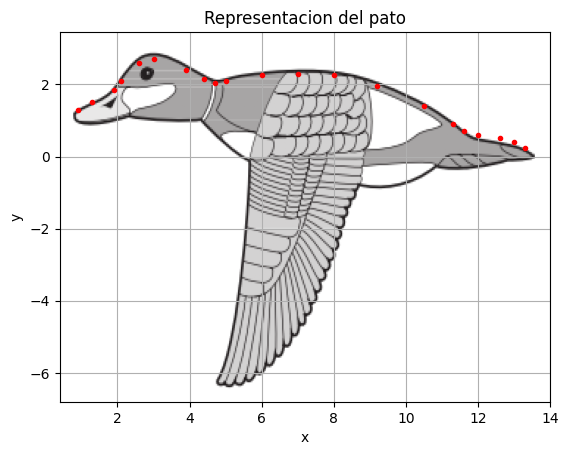

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

##Por polinomios de Lagrange

In [ ]:
lag_pato = lagrange(xp, yp)
print(lag_pato)

            20             19             18             17
-3.075e-11 x  + 4.279e-09 x  - 2.773e-07 x  + 1.111e-05 x 
              16            15           14         13         12
 - 0.0003082 x  + 0.006286 x  - 0.09769 x  + 1.183 x  - 11.32 x 
          11         10        9        8             7             6
 + 86.25 x  - 525.8 x  + 2564 x - 9969 x + 3.068e+04 x - 7.387e+04 x
              5             4           3             2
 + 1.368e+05 x - 1.899e+05 x + 1.9e+05 x - 1.287e+05 x + 5.246e+04 x - 9653


In [ ]:
#hermite_pato = CubicHermiteSpline()

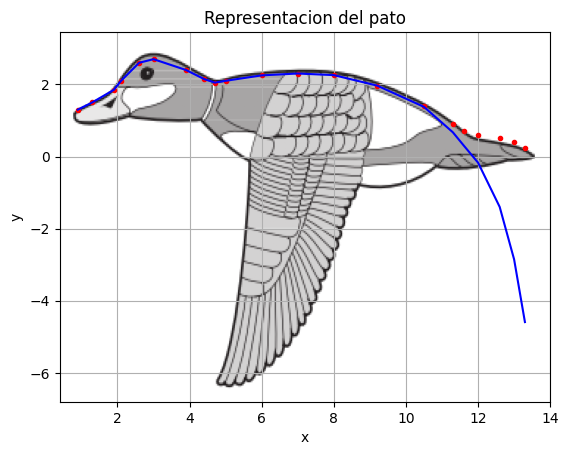

In [ ]:
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.plot(xp, lag_pato(xp), 'b-', label='Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

## Por polinomios de Hermite:

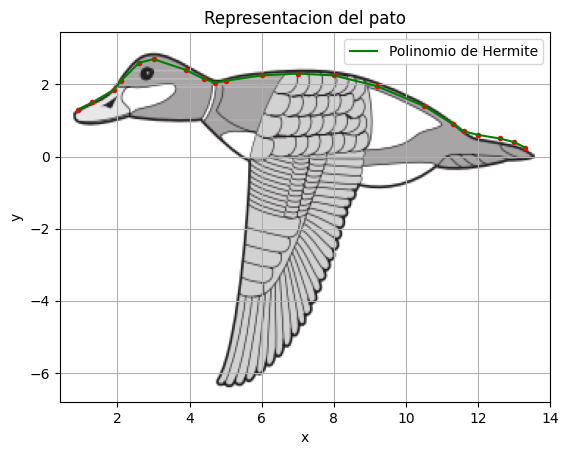

In [ ]:
h = 0.01
diferences = np.gradient(yp,h)
pato_hermite = CubicHermiteSpline(xp,yp,diferences)

plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.plot(xp, pato_hermite(xp), 'g-', label='Polinomio de Hermite')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

##Por Cubic Splines:

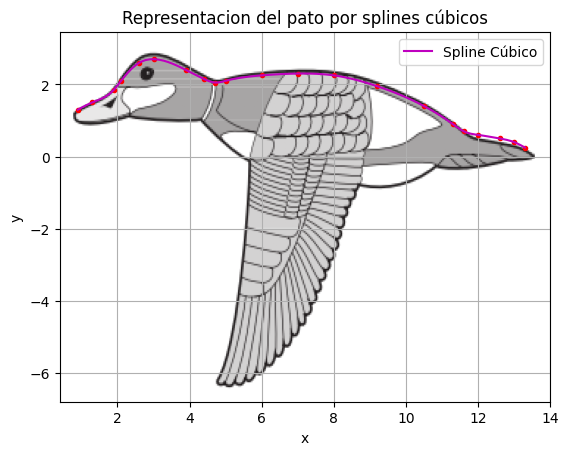

In [ ]:
cubic_spline = CubicSpline(xp, yp, bc_type='natural')
x_nuevo = np.linspace(min(xp),max(xp),100)
y_nuevo = cubic_spline(x_nuevo)

plt.figure()
plt.title('Representacion del pato por splines cúbicos')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.plot(x_nuevo, y_nuevo, 'm-', label='Spline Cúbico')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

##Mejor método
De los trés métodos usados: Lagrange, Hermite y los Spline cúbicos, el último muestra un comportamiento más suave y mejor ajustado a la gráfica.

El polinomio de Hermite se ajusta muy bien a la gráfica, con leves intervalos de "poca suavidad".

Lagrange también se ajusta, pero en los últimos puntos el polinomio se dispara y no pasa por estos últimos nada bien.

# Actividad
Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, encontrando los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [2]:
cero, uno, dos, tres = [-1,5], [0,3], [1,3], [2,4]

In [3]:
A = np.array([[1,1,1,0,0,0,0,0,0],
             [0,0,0,1,1,1,0,0,0],
             [0,0,0,0,0,0,1,1,1],
             [1,2,3,-1,0,0,0,0,0],
             [0,0,0,1,2,3,-1,0,0],
             [0,0,-3,0,1,0,0,0,0],
              [0,0,0,0,1,3,0,-1,0],
             [0,1,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,1,3]])
b = np.array([-2,0,1,0,0,0,0,0,0])
sol = np.linalg.solve(A,b)

In [4]:
#Constantes:
a0, a1, a2 = 5, 3, 3
b0, c0, d0, b1, c1, d1, b2, c2, d2 = sol

In [5]:
x = sp.symbols('x')
S0 = a0 + b0*(x-cero[0]) + c0*(x-cero[0])**2 + d0*(x-cero[0])**3
S1 = a1 + b1*(x-uno[0]) + c1*(x-uno[0])**2 + d1*(x-uno[0])**3
S2 = a2 + b2*(x-dos[0]) + c2*(x-dos[0])**2 + d2*(x-dos[0])**3

S0 = sp.lambdify(x, S0)
S1 = sp.lambdify(x, S1)
S2 = sp.lambdify(x, S2)

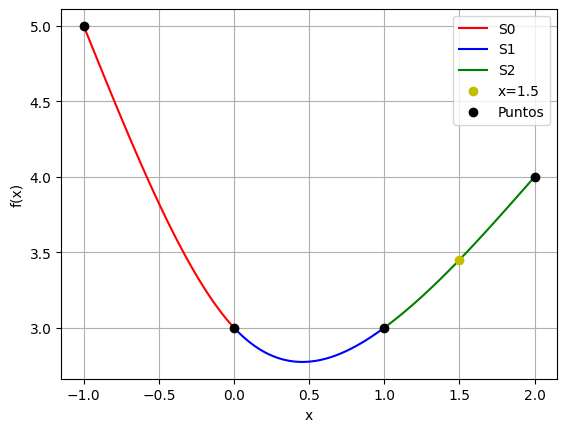

In [17]:
x_0 = np.linspace(cero[0], uno[0],100)
x_1 = np.linspace(uno[0], dos[0],100)
x_2 = np.linspace(dos[0], tres[0],100)
puntos_x = np.array([cero[0], uno[0], dos[0], tres[0]])
puntos_y = np.array([cero[1], uno[1], dos[1], tres[1]])

plt.plot(x_0, S0(x_0), 'r-', label='S0')
plt.plot(x_1, S1(x_1), 'b-', label='S1')
plt.plot(x_2, S2(x_2), 'g-', label='S2')
plt.plot(1.5, S2(1.5), 'yo', label='x=1.5')
plt.plot(puntos_x, puntos_y, 'ko', label='Puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

3.45


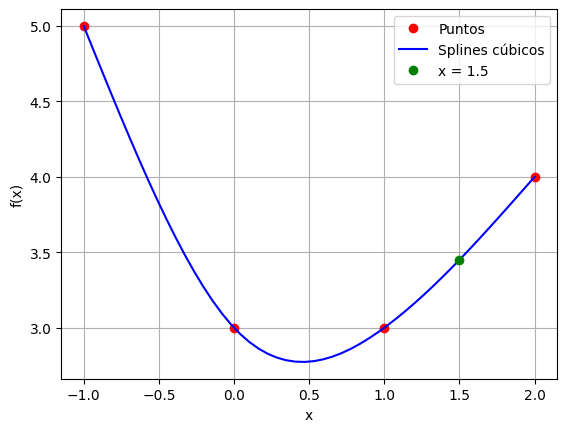

In [18]:
x_puntos = np.array([-1,0,1,2])
y_puntos= np.array([5,3,3,4])
CS = CubicSpline(x_puntos, y_puntos, bc_type='natural')

x_novo = np.linspace(min(x_puntos), max(x_puntos),50)
y_novo = CS(x_novo)

print(CS(1.5))
plt.plot(x_puntos, y_puntos , 'ro', label='Puntos')
plt.plot(x_novo, y_novo, 'b-', label="Splines cúbicos")
plt.plot(1.5, CS(1.5), 'go', label='x = 1.5')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()